# Plots for Texas Senate Maps

In [1]:
# low-level libraries
import os
import csv
from functools import partial
import importlib

# dealing with data
import numpy as np
import pandas as pd
#import geopandas as gpd

# plotting
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# make things look pretty
mpl.rcParams['font.size'] = 10
%config InlineBackend.figure_format = 'retina'

# GerryChain
from gerrychain import (GeographicPartition, Partition, Graph, MarkovChain,
                        proposals, updaters, constraints, accept, Election, metrics)
from gerrychain.proposals import recom
from gerrychain.metrics import efficiency_gap, mean_median

# SMU Gerrychain Wrapper
import GerryWrap as gw


In [16]:
## Where we have our output files
#newdir = "./Outputs_TXSN/"
#os.makedirs(os.path.dirname(newdir + "init.txt"), exist_ok=True)
#with open(newdir + "init.txt", "w") as f:
#    f.write("Created Folder")

data_dir = 'data/Texas/USHouse/ensemble/'

# Load the election results
fname = (data_dir + "votes_SEN12_Final.csv")
ensembles = np.loadtxt(fname, delimiter=',')
for ee in ensembles:
    ee = ee.sort()
    
# define and report
chainlength, districts = np.shape(ensembles)
print(districts, "districts")
print(chainlength, "RECOM steps")

36 districts
50000 RECOM steps


In [18]:
enacted = ensembles[0,:]
sampled = ensembles[10000:,:]

# Vote Vector:  Ensemble vs. Actual

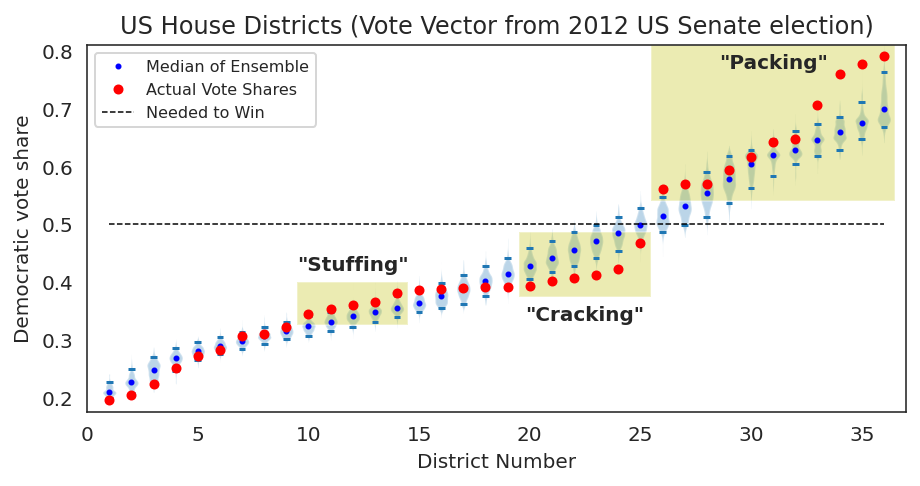

In [19]:
importlib.reload(gw)
plot_title = 'US House Districts (Vote Vector from 2012 US Senate election)'
myplot = gw.vote_vector_ensemble(sampled, enacted, plot_title, pc_thresh=.05)
myplot.savefig('seats-voteshares-ensemble-enacted-USCD-2012.pdf')
plt.show()

# Seats/Votes:  Varying Voteshare

Vote Needed for Majority (D-R) -- Ensemble:   0.0491
Seats at 50% Voteshare   (D-R) -- Ensemble:        3
Vote Needed for Majority (D-R) -- Actual:     0.0977
Seats at 50% Voteshare   (D-R) -- Actual:         11


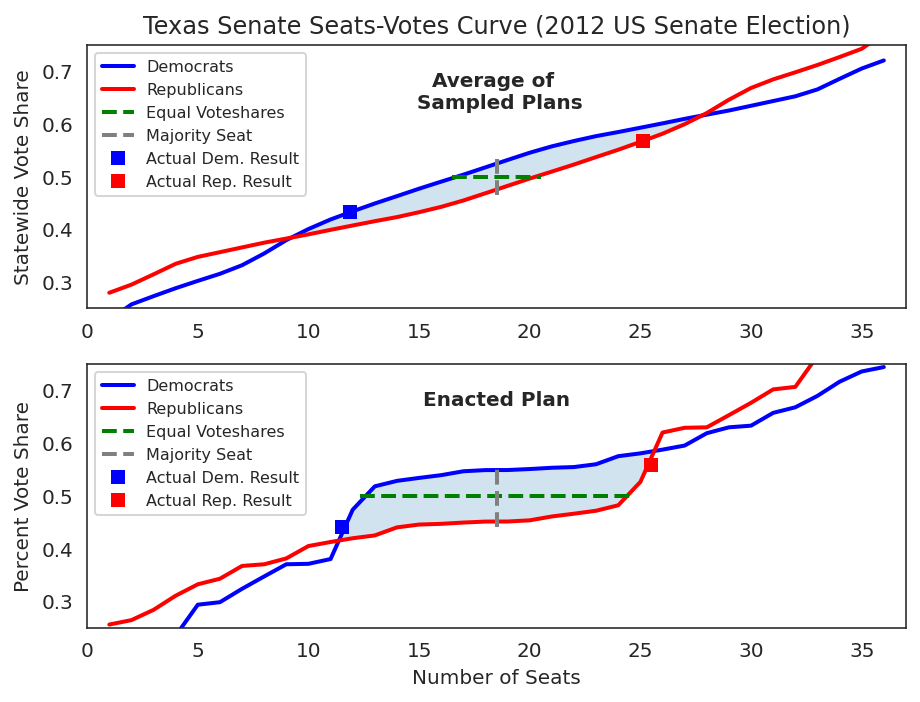

In [20]:
importlib.reload(gw)
plot_title = "Texas Senate Seats-Votes Curve (2012 US Senate Election)"
myplot = gw.seats_votes_ensemble(sampled, enacted, plot_title)
myplot.savefig("seats-votes-ensemble-enacted-USCD-2012.pdf")
plt.show()

# Mean/Median and Partisan Bias

MM Enacted Plan Percentile =  95.49
PB Enacted Plan Percentile =  0.02


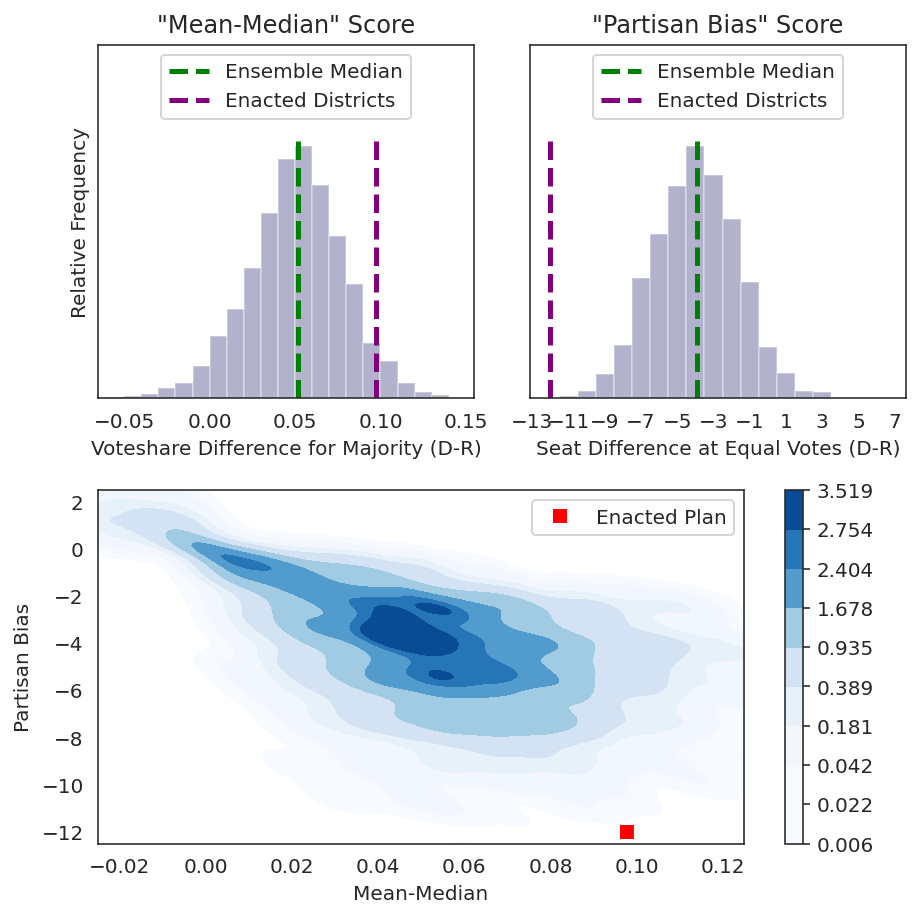

In [23]:
importlib.reload(gw)
myplot = gw.mean_median_partisan_bias(sampled, enacted)
myplot.savefig("mean-median-partisan-bias-ensemble-enacted-USCD-2012.pdf")
plt.show()